In [ ]:
# Run a sample Jupyter notebook version of the Web PK Calculator
# You can customize this and adapt it to your needs -> some basic Python skills are necessary
# Made as part of the Study PK (Pharmacokinetics) Project at the Appel Lab, Stanford University

# 1/9/2021
# This code was inspired by Joseph Mann, Ph.D. candidate in the Appel Lab. 

In [4]:
# python3 -m pip install numpy pandas scipy matplotlib

# Import all the necessary packages 
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt
from scipy.integrate import odeint


In [ ]:
# Throughout this example, I will have a model with 3 compartments. You can modify this as you wish.

In [ ]:
########################### Part 1 begins here! Known k-values, generating data and graphing tools ###########################

In [6]:
def pk_derivative(y0, t, k):
    """
    Function which will output instantaneous derivatives for each compartment at a given time t.
    The Integrator class in Javascript from the web version of this takes in a function dydt which is 
    similar to this function.
    Note, this example is for where there are 3 compartments. You can have as many compartments as you want.
    You will need to modify the set of differential equations and other parameters accordingly.
    -------
    input:
    y0 (list) ... provides a list of the concentrations, one value for each compartment
    t (float) ... timepoint to calculate instantaneous derivatives
    -------
    output:
    (list) of instantaneous derivatives for each compartment
    """
    # Differential equations if there were 3 compartments
    dx1dt = -k[0]*y0[0]
    dx2dt = -k[1]*y0[1] + k[0]*y0[0]
    dx3dt = -k[2]*y0[2] + k[1]*y0[1]

    # You can include animal constants on any compartment just like in the web version
    # if you want the units to be in concentration rather than in mass.
    # But of course, you can have even better customizability.
    # For example, if I wanted to modify the 3rd compartment with an animal constant
    # dx3dt = -k[2]*y0[2] + k[1]*y0[1]/(.142*60) for humans would work.

    return [dx1dt, dx2dt, dx3dt] # Return a list of the instaneous derivatives, one for each compartment


In [7]:
# I will provide some sample inputs here.
y0 = [4000, 0, 0]
time_range = np.linspace(0, 400, 100000) # I want to go for 400 minutes and have 100,000 timepoints
# time_range will be passed into odeint for it to generate values across the entire time_range
# 100000 is an arbitrary number and you can pick anything.
k = [0.01, 0.06, 0.17] # Made up k-values
solve = odeint(pk_derivative, y0, time_range, args=(k, ))

In [9]:
solve # Outputs a numpy array with a lot of values! There are 100,000 arrays of size 3 each representing each compartment at that particular point in time

array([[4.00000000e+03, 0.00000000e+00, 0.00000000e+00],
       [3.99984000e+03, 1.59979203e-01, 1.91894011e-05],
       [3.99968001e+03, 3.19913616e-01, 7.67432779e-05],
       ...,
       [7.32684133e+01, 1.46536826e+01, 5.49513098e+00],
       [7.32654826e+01, 1.46530965e+01, 5.49491118e+00],
       [7.32625520e+01, 1.46525104e+01, 5.49469139e+00]])

Text(0.5, 0, 'Time (min')

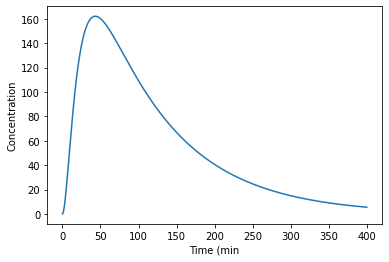

In [10]:
interested_data = solve[:,2] # You can slice this list with Python slicing to only give the data set you care about 
# Then, you can feed this into matplotlib plots which can graph the data for you. I am only interested in the last
# compartment for example.

plt.plot(time_range, interested_data)
plt.ylabel('Concentration')
plt.xlabel('Time (min')

In [ ]:
########################### Part 2 begins here! Unknown k-values, input experimental data ###########################